In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
PassengerId = test["PassengerId"]

In [5]:
train["set"] = "train"
test["set"] = "test"

In [6]:
test["Survived"] = np.nan

In [7]:
titanic = pd.concat([train, test], sort = False)

In [8]:
titanic.head() # head(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [9]:
titanic.tail() #tail(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


In [10]:
titanic.describe() #summary(titanic)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
set            1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [12]:
titanic.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
set               0
dtype: int64

## Data Cleaning / Feature Engineering
### Cabin

In [13]:
# Since there are so many null values we will drop the column
titanic.drop("Cabin", axis = 1, inplace = True)

### Age

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Count')

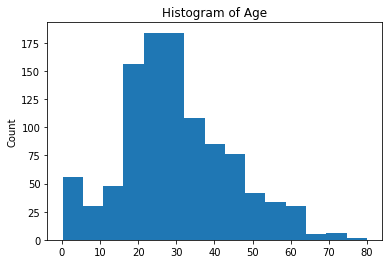

In [14]:
plt.hist(titanic["Age"], bins = 15)
plt.title("Histogram of Age")
plt.ylabel("Count")

Text(0.5, 1.0, 'Boxplot of Age')

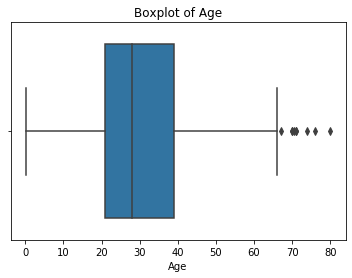

In [15]:
sns.boxplot(titanic["Age"])
plt.title("Boxplot of Age")

We will replace the missing values in the Age variable with the median

In [16]:
median_age = titanic["Age"].median()

In [17]:
titanic["Age"].fillna(median_age, inplace = True)

### Embarked

In [18]:
# We can change the values to be the full names of the places people embarked the titanic
embarked = []
for i in range(titanic.shape[0]):
    if titanic.iloc[i, titanic.columns.get_loc("Embarked")] == "S":
        embarked.append("Southampton")
    elif titanic.iloc[i, titanic.columns.get_loc("Embarked")] == "C":
        embarked.append("Cherbourgh")
    elif titanic.iloc[i, titanic.columns.get_loc("Embarked")] == "Q":
        embarked.append("Queenstown")
    else:
        embarked.append(np.nan)

In [19]:
titanic["Embarked"] = embarked

In [20]:
titanic["Embarked"].value_counts(normalize = True)

Southampton    0.699311
Cherbourgh     0.206580
Queenstown     0.094109
Name: Embarked, dtype: float64

Text(0, 0.5, 'Count')

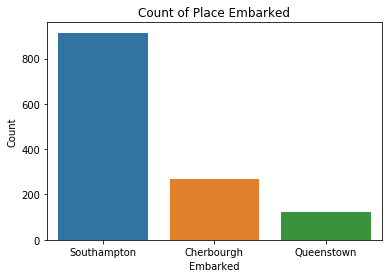

In [21]:
sns.countplot(titanic["Embarked"])
plt.title("Count of Place Embarked")
plt.ylabel("Count")

In [22]:
# Replace the value with the most common occurance
import statistics
titanic["Embarked"] = titanic["Embarked"].fillna(statistics.mode(titanic["Embarked"]))

### Name

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,set
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourgh,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton,train


In [24]:
title = titanic["Name"].str.extract(r"(\w+)\.")

In [25]:
title[0].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [26]:
title[0].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Capt          1
Sir           1
Dona          1
Lady          1
Countess      1
Jonkheer      1
Mme           1
Don           1
Name: 0, dtype: int64

In [27]:
titanic["Title"] = title

In [28]:
titanic["Title"].replace(["Ms","Mlle"], "Miss", inplace = True)
titanic["Title"].replace(["Mme", "Countess", "Lady", "Dona"], "Mrs", inplace = True)
titanic["Title"].replace(["Dr", "Rev", "Col", "Major", "Jonkheer", "Don", "Capt", "Sir"], "Mr", inplace = True)
titanic.drop("Name", axis = 1, inplace = True)

In [29]:
titanic["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

### Sibsp and Parch

Sibsp shows the # of siblings and spouses on board. Parch shows the number of parents and children on board. We can create a variable to show how many family members each person had on board.

In [30]:
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1

In [31]:
titanic[["FamilySize", "Survived"]].groupby("FamilySize").mean().sort_values(by = "Survived", ascending = False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


### Fare

Text(0.5, 1.0, 'Boxplot of Fare')

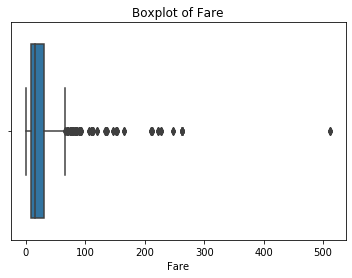

In [32]:
sns.boxplot(titanic["Fare"])
plt.title("Boxplot of Fare")

In [33]:
# We will replaee the missing value with the median
titanic["Fare"].fillna(titanic["Fare"].median(), inplace = True)

## Some Visualizations of the Training Data

In [34]:
train = titanic[titanic["set"] == "train"]
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'set', 'Title', 'FamilySize'],
      dtype='object')

### Survived

In [35]:
train["Survived"].value_counts(normalize = True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

Text(0, 0.5, 'Count')

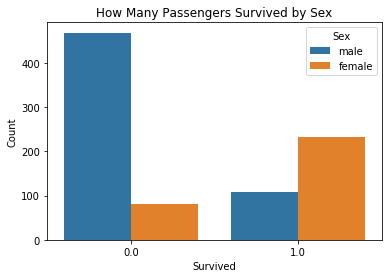

In [36]:
sns.countplot(train["Survived"], hue = train["Sex"])
plt.title("How Many Passengers Survived by Sex")
plt.ylabel("Count")

More women survived the sinking of the titanic then men, even though there were more men on board.

### Pclass

In [37]:
train[["Pclass", "Survived"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0.5, 0, 'Passenger Class')

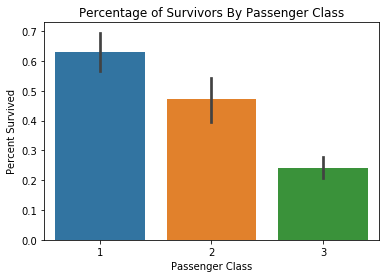

In [38]:
sns.barplot(train["Pclass"], train["Survived"])
plt.title("Percentage of Survivors By Passenger Class")
plt.ylabel("Percent Survived")
plt.xlabel("Passenger Class")

Passengers in first class have a higher survival rate than those in second and third class.

Text(0.5, 0, 'Passenger Class')

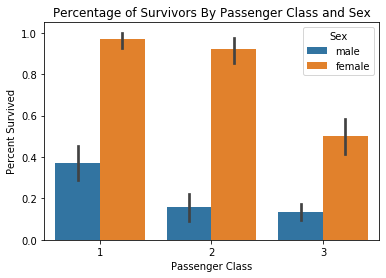

In [39]:
sns.barplot(train["Pclass"], train["Survived"], hue = train["Sex"])
plt.title("Percentage of Survivors By Passenger Class and Sex")
plt.ylabel("Percent Survived")
plt.xlabel("Passenger Class")

We already know that in total, passengers in first class have a higher chance of surviving than second or third class. But from looking at that same graph with the sex variable included, we can see that a majority of the survivors in all passenger classes were women. However, there is a very noticable drop off in the percentage of woman who survived in third class, with only about 50% of the women surviving.

### Title

In [40]:
titanic[["Title", "Fare"]].groupby("Title").mean()

,Fare
Title,
Master,36.008195
Miss,42.566747
Mr,25.371721
Mrs,51.068470


Text(0.5, 1.0, 'Fares Paid By Title')

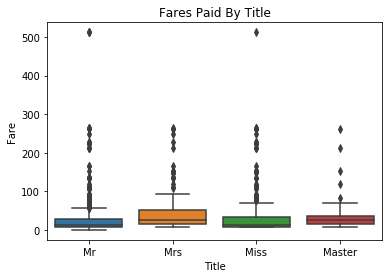

In [41]:
sns.boxplot(train["Title"], titanic["Fare"])
plt.title("Fares Paid By Title")

It seems like women paid more for their tickets then men did.

### Fare

Text(0.5, 1.0, 'Fares Paid by Sex')

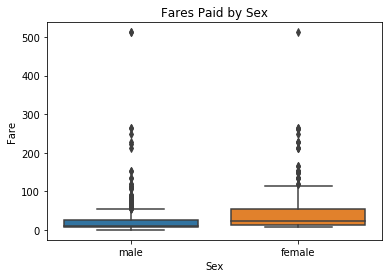

In [42]:
sns.boxplot(train["Sex"], train["Fare"])
plt.title("Fares Paid by Sex")

This plot helps to reinforce the information we gathered from the plot of Title and Fare. That women paid more for their tickets on the titanic then men did.

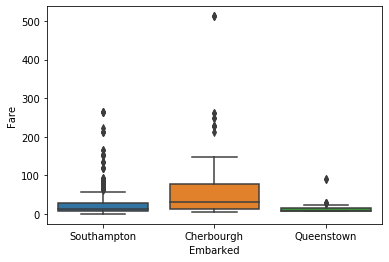

In [43]:
sns.boxplot(train["Embarked"], train["Fare"])

It looks like the fare to board the titanic at Cherbough was more expensive then both Southhampton and Queenstown.

## Modeling
### Prepare data

In [44]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'set', 'Title', 'FamilySize'],
      dtype='object')

In [45]:
titanic.drop(["PassengerId", "Ticket"], axis = 1, inplace = True)

In [46]:
titanic["Pclass"] = titanic["Pclass"].astype(str)
titanic["Survived"] = titanic["Survived"].astype(str)

In [47]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Survived      1309 non-null object
Pclass        1309 non-null object
Sex           1309 non-null object
Age           1309 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Fare          1309 non-null float64
Embarked      1309 non-null object
set           1309 non-null object
Title         1309 non-null object
FamilySize    1309 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 162.7+ KB


In [48]:
training_data = titanic[titanic["set"] == "train"]
testing_data = titanic[titanic["set"] == "test"]

In [49]:
training_data.drop("set", axis = 1, inplace = True)
testing_data.drop("set", axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [51]:
X_train = training_data.drop("Survived", axis = 1)
y_train = training_data["Survived"]
X_test = testing_data.drop("Survived", axis = 1)

In [52]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [53]:
print(X_train.head())

    Age  SibSp  Parch     Fare  FamilySize  Pclass_1  Pclass_2  Pclass_3  \
0  22.0      1      0   7.2500           2         0         0         1   
1  38.0      1      0  71.2833           2         1         0         0   
2  26.0      0      0   7.9250           1         0         0         1   
3  35.0      1      0  53.1000           2         1         0         0   
4  35.0      0      0   8.0500           1         0         0         1   

   Sex_female  Sex_male  Embarked_Cherbourgh  Embarked_Queenstown  \
0           0         1                    0                    0   
1           1         0                    1                    0   
2           1         0                    0                    0   
3           1         0                    0                    0   
4           0         1                    0                    0   

   Embarked_Southampton  Title_Master  Title_Miss  Title_Mr  Title_Mrs  
0                     1             0           0      

In [54]:
print(y_train.head())

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: object


### Logistic Regression

In [55]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
y_pred_log = log_reg.predict(X_test).astype(float).astype(int)

In [102]:
submission_log = pd.DataFrame({
    "PassengerId": PassengerId,
    "Survived": y_pred_log
})
submission.to_csv("log_reg_submission.csv", index = False)

In [103]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


### KNN

Text(0.5, 0, 'K')

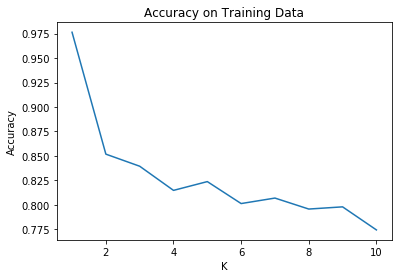

In [125]:
num_neighbors = np.arange(1, 11)
knn_score = np.empty(len(num_neighbors))
for i, k in enumerate(num_neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    knn_score[i] = knn.score(X_train, y_train)
plt.plot(range(1, 11), knn_score)
plt.title("Accuracy on Training Data")
plt.ylabel("Accuracy")
plt.xlabel("K")

In [120]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [121]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [122]:
y_pred_knn = knn.predict(X_test).astype(float).astype(int)

In [123]:
submission_knn = pd.DataFrame({
    "PassengerId": PassengerId,
    "Survived": y_pred_knn
})
submission_knn.to_csv("knn_submission.csv", index = False)

In [124]:
submission_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB
